Notebook for 2D Deconvolution in CUQI

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cuqi

3rd party engines available for cuqi: astra


c:\Users\chris\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


Dimension of model is 16384


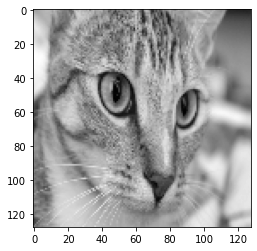

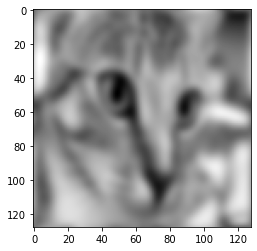

In [2]:
# importing test problem. Here the phantom is the picture chosen for testing
TP = cuqi.testproblem.Deconvolution2D(phantom=cuqi.data.cat(size=128))
# dimensions of picture (128*128)
print("Dimension of model is", TP.model.domain_dim)

#Choose prior
TP.prior = cuqi.distribution.Laplace_diff(location=np.zeros(TP.model.domain_dim),scale=1)
#TP.prior = cuqi.distribution.Gaussian(mean=np.zeros(TP.model.domain_dim),cov=1)

#the real cat
TP.exactSolution.plot()

# the blurred cat
plt.figure()
TP.data.plot()


Sample 240 / 240


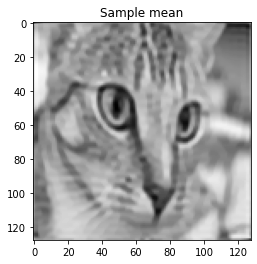

In [3]:
# reconstruction of cat
plt.figure()
X = TP.sample_posterior(200)
X.plot_mean()

(<matplotlib.image.AxesImage at 0x235859a58b0>,)

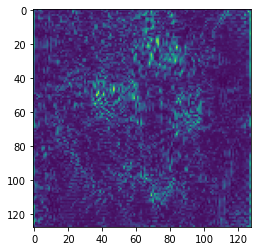

In [10]:
#X.plot_std()
plt.imshow(np.reshape(np.std(X.samples,axis=-1), (-1, 128))), #cmap = 'gray')
plt.plot(np.reshape(np.std(X.samples,axis=-1)))